In [1040]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, cuda

In [1041]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [1042]:
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    squared_errors = (predictions - Y) ** 2
    return 1 / (2 * m) * np.sum(squared_errors)

In [1043]:
def gradient_descent(X, Y, theta, alpha, num_iters):
    for iter in range(num_iters):
        predictions = np.matmul(X, theta)
        errors = predictions - Y
        delta = np.matmul(np.transpose(X), errors)
        theta = theta - (alpha * delta)
    return theta

In [1044]:
def plot_model(weights, mu, sigma, X, Y):
    x = np.array([])
    y = np.array([])
    for i in range(200, 300):
        normalized_area = (i - mu) / sigma
        estimated_price = np.matmul(np.transpose(weights), np.array([1, normalized_area]))
        x = np.append(x, i)
        y = np.append(y, estimated_price)
    plt.plot(X, Y, linestyle='None', marker='o')
    plt.plot(x, y)
    plt.show()

In [1045]:
def plot_cost_contour(X, Y):
    theta0_vals = np.linspace(0, 3000, 3000)
    theta1_vals = np.linspace(0, 500, 500)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            theta = np.array([theta0, theta1])
            J_vals[i, j] = compute_cost(X, Y, theta)
    plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(0, 20, 100), cmap='viridis')
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title('Contour Plot of Cost Function')
    plt.colorbar(label='Cost')
    plt.legend()
    plt.show()

[1373.75        216.82887552]


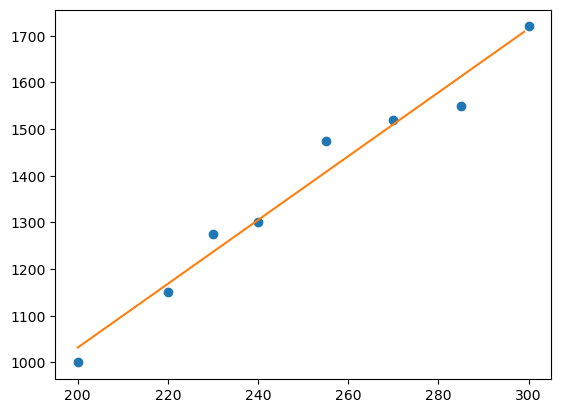

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


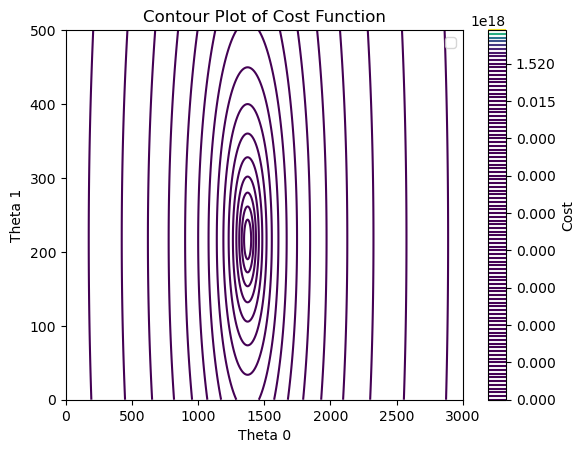

In [1046]:
area = np.array([200, 220, 230, 240, 255, 270, 285, 300])
price = np.array([1000, 1150, 1275, 1300, 1475, 1520, 1550, 1720])
total_iters = 1500
learning_rate = 0.01
weights = np.zeros(2)

normalized_area, mu, sigma = feature_normalize(area)
formatted_area = np.c_[np.ones(normalized_area.shape[0]), normalized_area]
weights = gradient_descent(formatted_area, price, weights, learning_rate, total_iters)
print(weights)
plot_model(weights, mu, sigma, area, price)
plot_cost_contour(formatted_area, price)